## Plan of Action

*   **CK+ Dataset images** are stored **in separate folders,** named basis their emotion labels:
 *   0 = 'anger', 1 = 'contempt',  2 = 'disgust',    3 = 'fear',    4 = 'happy',    5 = 'sadness',    6 = 'surprise'

* Convert all images to **grayscale**
* **Define emotion labels** basis use case
* Using **X epochs** on our **defined CNN Architecture**, comprising of:
    - an input *Conv2D* layer (with 32 filters) paired with an *MaxPooling2D* layer,
    - 3 pairs of *Conv2D* (with 64, 128 & 256 filters) and *MaxPooling2D* layers,
    - 1 *Dense* layer with 128 nodes, and
    - an output *Dense* layer with 3 nodes.

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/Project5_AgeGenderEmotion_Detection/1.3_emotion_input_output
!ls

/content/drive/My Drive/Project5_AgeGenderEmotion_Detection/1.3_emotion_input_output
input  output


# Import Libraties/ Functions

In [3]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

# Import Dataset

In [ ]:
dataset_folder='./input/CK+48'
sub_folders=os.listdir(dataset_folder)

sub_folders

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [ ]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  # Define labels basis use case. We are using positive:0, negative:1, neutral:2 
  # for our use case of predicting emotions of visitors entering a retail store
  if  label in [4, 6]:    # label in ['happy', 'surprise']
    new_label=0           # changed to label = positive emotion
  elif label in [0,5]:      # label in ['anger','sadness']
    new_label=1           # changed to label = negative emotion
  else:                   # label in ['contempt', 'disgust', 'fear']
    new_label=2           # changed to label = neutral emotion
  
  
  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)
  
  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(new_label))
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(new_label)
    i+=1
  last.append(i)

./input/CK+48/anger/S010_004_00000017.png	1
./input/CK+48/anger/S010_004_00000018.png	1
./input/CK+48/anger/S011_004_00000020.png	1
./input/CK+48/anger/S010_004_00000019.png	1
./input/CK+48/anger/S011_004_00000019.png	1
./input/CK+48/anger/S014_003_00000028.png	1
./input/CK+48/anger/S011_004_00000021.png	1
./input/CK+48/anger/S014_003_00000030.png	1
./input/CK+48/anger/S014_003_00000029.png	1
./input/CK+48/anger/S022_005_00000030.png	1
./input/CK+48/anger/S022_005_00000031.png	1
./input/CK+48/anger/S022_005_00000032.png	1
./input/CK+48/anger/S026_003_00000013.png	1
./input/CK+48/anger/S026_003_00000014.png	1
./input/CK+48/anger/S026_003_00000015.png	1
./input/CK+48/anger/S028_001_00000022.png	1
./input/CK+48/anger/S028_001_00000023.png	1
./input/CK+48/anger/S028_001_00000024.png	1
./input/CK+48/anger/S029_001_00000018.png	1
./input/CK+48/anger/S029_001_00000019.png	1
./input/CK+48/anger/S029_001_00000017.png	1
./input/CK+48/anger/S032_003_00000015.png	1
./input/CK+48/anger/S032_003_000

In [ ]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255

In [ ]:
images_x.shape

(981, 48, 48)

In [ ]:
# encoding the labels
num_of_classes = 3
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

# Split into Train / Test

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

In [ ]:
len(X_train)

735

In [ ]:
len(X_test)

246

# Define CNN Architecture

In [ ]:
input = Input(shape = (48,48,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(3,activation="sigmoid")(drop_1)

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

# Model Training

In [ ]:
fle_s='./output/emotion_model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50,callbacks=[callback_list])

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 1.3038 - accuracy: 0.4490
Epoch 00001: loss improved from inf to 1.30382, saving model to ./output/emotion_model.h5
23/23 [==============================] - 11s 47ms/step - loss: 1.3038 - accuracy: 0.4490 - val_loss: 1.2193 - val_accuracy: 0.4756
Epoch 2/50
17/23 [=====================>........] - ETA: 0s - loss: 1.1863 - accuracy: 0.4614
Epoch 00002: loss improved from 1.30382 to 1.17975, saving model to ./output/emotion_model.h5
23/23 [==============================] - 0s 13ms/step - loss: 1.1797 - accuracy: 0.4612 - val_loss: 1.1361 - val_accuracy: 0.4756
Epoch 3/50
17/23 [=====================>........] - ETA: 0s - loss: 1.1010 - accuracy: 0.4798
Epoch 00003: loss improved from 1.17975 to 1.08275, saving model to ./output/emotion_model.h5
23/23 [==============================] - 0s 13ms/step - loss: 1.0827 - accuracy: 0.4816 - val_loss: 0.9548 - val_accuracy: 0.5488
Epoch 4/50
23/23 [==============================]

# Model Performance

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

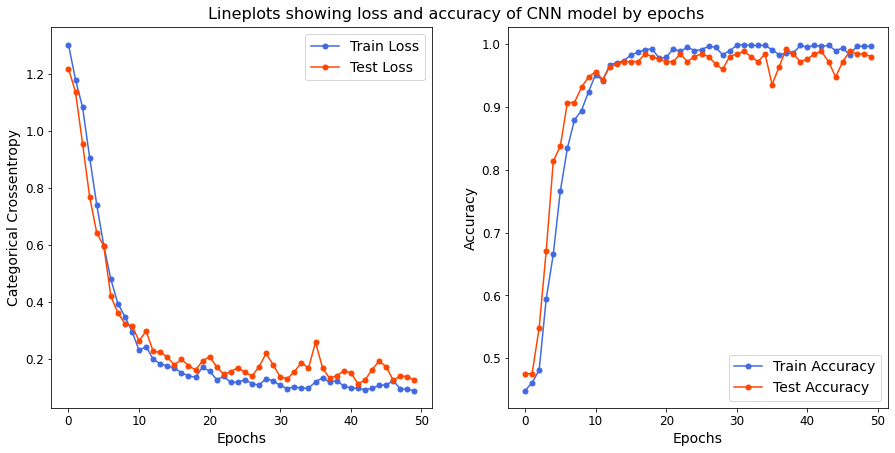

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)